In [1]:
import matplotlib.pyplot as plt # 导入matplotlib库
import numpy as np
import cv2

import collections

---

## import dataset

In [2]:
X_train = []
y_train = []
X_test = []
y_test = []
X_comp = []


with open("manmade_training.txt",'r') as f:
  context = f.read()
  mm = context.split('\n')
  for i in range(0,len(mm)-1):
    im = cv2.imread(mm[i],cv2.IMREAD_COLOR)
    im1 = cv2.resize(im,(256,256))
    X_train.append(im1)
    y_train.append(0)


with open("manmade_test.txt",'r') as f:
  context = f.read()
  mm = context.split('\n')
  for i in range(0,len(mm)-1):
    im = cv2.imread(mm[i],cv2.IMREAD_COLOR)
    im1 = cv2.resize(im,(256,256))
    X_test.append(im1)
    y_test.append(0)




with open("natural_training.txt",'r') as f:
  context = f.read()
  mm = context.split('\n')
  for i in range(0,len(mm)-1):
    im = cv2.imread(mm[i],cv2.IMREAD_COLOR)
    im1 = cv2.resize(im,(256,256))
    X_train.append(im1)
    y_train.append(1)


    
with open("natural_test.txt",'r') as f:
  context = f.read()
  mm = context.split('\n')
  for i in range(0,len(mm)-1):
    im = cv2.imread(mm[i],cv2.IMREAD_COLOR)
    im1 = cv2.resize(im,(256,256))
    X_test.append(im1)
    y_test.append(1)


with open("E:\\Uni\\work\\grade3.1\\AI\\pro1\\competition\\images.txt",'r') as f:
  context = f.read()
  mm = context.split('\n')
  for i in range(0,len(mm)-1):
    im = cv2.imread(str("E:\\Uni\\work\\grade3.1\\AI\\pro1\\competition\\Images\\"+mm[i]),cv2.IMREAD_COLOR)
    im1 = cv2.resize(im,(256,256))
    X_comp.append(im1)



----
## pre-PROCESS

灰度直方图均衡化 -> 有利于边缘检测

In [3]:
X_train_gray_equ = []
X_test_gray_equ = []
X_comp_gray_equ = []

for i in range(0,len(X_train)):
  img = X_train[i].astype(np.uint8)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  X_train_gray_equ.append(cv2.equalizeHist(img))

for i in range(0,len(X_test)):
  img = X_test[i].astype(np.uint8)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  X_test_gray_equ.append(cv2.equalizeHist(img))

for i in range(0,len(X_comp)):
  img = X_comp[i].astype(np.uint8)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  X_comp_gray_equ.append(cv2.equalizeHist(img))

高斯模糊

In [4]:
X_train_equ_blur = []
X_test_equ_blur = []
X_comp_equ_blur = []

for i in range(0,len(X_train_gray_equ)):
  X_train_equ_blur.append(cv2.GaussianBlur(X_train_gray_equ[i],(5,5),1.5))

for i in range(0,len(X_test_gray_equ)):
  X_test_equ_blur.append(cv2.GaussianBlur(X_test_gray_equ[i],(5,5),1.5))

for i in range(0,len(X_comp_gray_equ)):
  X_comp_equ_blur.append(cv2.GaussianBlur(X_comp_gray_equ[i],(5,5),1.5))

canny 用opencv自带的快很多

Text(0.5, 1.0, 'Canny after Gaussian blur')

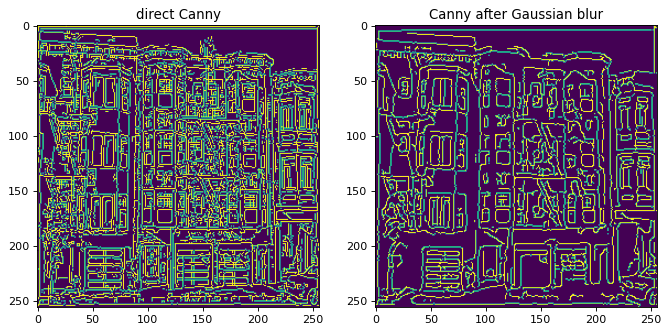

In [5]:
edge = cv2.Canny(X_train_gray_equ[480],30,100) 
edge2 = cv2.Canny(X_train_equ_blur[480],30,100) 

fig,ax = plt.subplots(1,2,figsize=(10,20),dpi=80)
ax[0].imshow(edge)
ax[0].set_title('direct Canny')
ax[1].imshow(edge2)
ax[1].set_title('Canny after Gaussian blur')


In [6]:
X_train_edge = []
for i in range(0,len(X_train_equ_blur)):
  X_train_edge.append(cv2.Canny(X_train_equ_blur[i],30,100))

X_test_edge = []
for i in range(0,len(X_test_equ_blur)):
  X_test_edge.append(cv2.Canny(X_test_equ_blur[i],30,100))

X_comp_edge = []
for i in range(0,len(X_comp_equ_blur)):
  X_comp_edge.append(cv2.Canny(X_comp_equ_blur[i],30,100))

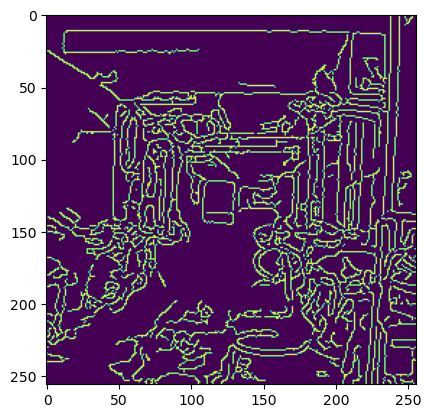

In [7]:
plt.imshow(X_train_edge[0])

----

## 霍尔检测

In [8]:
#手动调参
def nothing(x):  # 滑动条的回调函数
    pass

WindowName = 'Approx'  # 窗口名
cv2.namedWindow(WindowName, cv2.WINDOW_AUTOSIZE)  # 建立空窗口
 
cv2.createTrackbar('threshold', WindowName, 0, 100, nothing)  # 创建滑动条
cv2.createTrackbar('minLineLength', WindowName, 0, 100, nothing)  # 创建滑动条
cv2.createTrackbar('maxLineGap', WindowName, 0, 100, nothing)  # 创建滑动条
 
while(1):
    img = X_train[805].copy()
    threshold = cv2.getTrackbarPos('threshold', WindowName)  # 获取滑动条值
    minLineLength = 2 * cv2.getTrackbarPos('minLineLength', WindowName)  # 获取滑动条值
    maxLineGap = cv2.getTrackbarPos('maxLineGap', WindowName)  # 获取滑动条值
 
    lines = cv2.HoughLinesP(X_train_edge[805], 1, np.pi/180, threshold, minLineLength, maxLineGap)

    if lines is None:
      print(threshold," ", minLineLength," ", maxLineGap)
      break


    for line in lines:
        x1 = line[0][0]
        y1 = line[0][1]
        x2 = line[0][2]
        y2 = line[0][3]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
 
    cv2.imshow(WindowName, img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'Approx' in function 'cvGetTrackbarPos'


In [9]:
# #存储线段的数量
# X_train_hough = []
# X_test_hough = []
# X_comp_hough = []

# for i in range(0,len(X_train_equ_blur)):
#   lines = cv2.HoughLinesP(X_train_equ_blur[i], 1, np.pi/180, 7, 100, 7.4)
#   X_train_hough.append(len(lines))


# for i in range(0,len(X_test_equ_blur)):
#   lines = cv2.HoughLinesP(X_test_equ_blur[i], 1, np.pi/180, 7, 100, 7.4)
#   X_test_hough.append(len(lines))

# for i in range(0,len(X_comp_equ_blur)):
#   lines = cv2.HoughLinesP(X_comp_equ_blur[i], 1, np.pi/180, 7, 100, 7.4)
#   X_comp_hough.append(len(lines))

In [10]:
#存储线段的数量 and 调整参数后存储最长线段的长度（图像尺度问题？！最长线段短有可能是因为拍得远！）
X_train_hough_len = []
X_test_hough_len = []

X_train_hough = []
X_test_hough = []

th1 = 7
maxg1 = 7.4
th2 = 15
maxg2 = 20

for i in range(0,len(X_train_edge)):
  lines = cv2.HoughLinesP(X_train_edge[i], 1, np.pi/180, th1, 100, maxg1)
  if lines is None:
    X_train_hough.append(0)
  else:
    X_train_hough.append(len(lines))

  lines_for_length = cv2.HoughLinesP(X_train_edge[i], 1, np.pi/180, th2, 100, maxg2)
  max_length = 0 #曼哈顿距离
  if lines_for_length is not None:
    for line in lines_for_length:
      x1 = line[0][0]
      y1 = line[0][1]
      x2 = line[0][2]
      y2 = line[0][3]
      temp = y2-y1+x2-x1
      if temp > max_length:
        max_length = temp
    
  X_train_hough_len.append(max_length)
        
  


for i in range(0,len(X_test_edge)):
  lines = cv2.HoughLinesP(X_test_edge[i], 1, np.pi/180, th1, 100, maxg1)
  if lines is None:
    X_test_hough.append(0)
  else:
    X_test_hough.append(len(lines))
  
  lines_for_length = cv2.HoughLinesP(X_test_edge[i], 1, np.pi/180, th2, 100, maxg2)
  max_length = 0 #曼哈顿距离
  if lines_for_length is not None:
    for line in lines_for_length:
      x1 = line[0][0]
      y1 = line[0][1]
      x2 = line[0][2]
      y2 = line[0][3]
      temp = y2-y1+x2-x1
      if temp > max_length:
        max_length = temp
    
  X_test_hough_len.append(max_length)


In [80]:
#存储线段的数量 and 调整参数后存储最长线段的长度（图像尺度问题？！最长线段短有可能是因为拍得远！）
X_comp_hough_len = []
X_comp_hough = []


th1 = 7
maxg1 = 7.4
th2 = 15
maxg2 = 20

for i in range(0,len(X_comp_edge)):
  lines = cv2.HoughLinesP(X_comp_edge[i], 1, np.pi/180, th1, 100, maxg1)
  if lines is None:
    X_comp_hough.append(0)
  else:
    X_comp_hough.append(len(lines))

  lines_for_length = cv2.HoughLinesP(X_comp_edge[i], 1, np.pi/180, th2, 100, maxg2)
  max_length = 0 #曼哈顿距离
  if lines_for_length is not None:
    for line in lines_for_length:
      x1 = line[0][0]
      y1 = line[0][1]
      x2 = line[0][2]
      y2 = line[0][3]
      temp = y2-y1+x2-x1
      if temp > max_length:
        max_length = temp
    
  X_comp_hough_len.append(max_length)
        

In [11]:
#manmade最长线段长/nature最长线段长：越大越好
print(np.mean(X_test_hough_len[0:251])/np.mean(X_test_hough_len[251:501]))
print([th1,maxg1,th2,maxg2])

2.399819599375443
[7, 7.4, 15, 20]


In [12]:
#manmade,0的个数 / nature, 0的个数：越小越好
np.sum(np.where(X_test_hough_len[0:251],0,1))/np.sum(np.where(X_test_hough_len[251:501],0,1))

0.30718954248366015

In [13]:
np.sum(np.where(X_test_hough_len[251:501],0,1))/len(X_test)

0.306

In [14]:
np.sum(np.where(X_train_hough_len[0:251],0,1))/len(X_train)

0.04

In [15]:
#线段数量，两者对比
np.mean(X_train_hough[0:501])/np.mean(X_train_hough[501:1001])

2.216495354566654

Text(0.5, 1.0, 'the max length of line in each image')

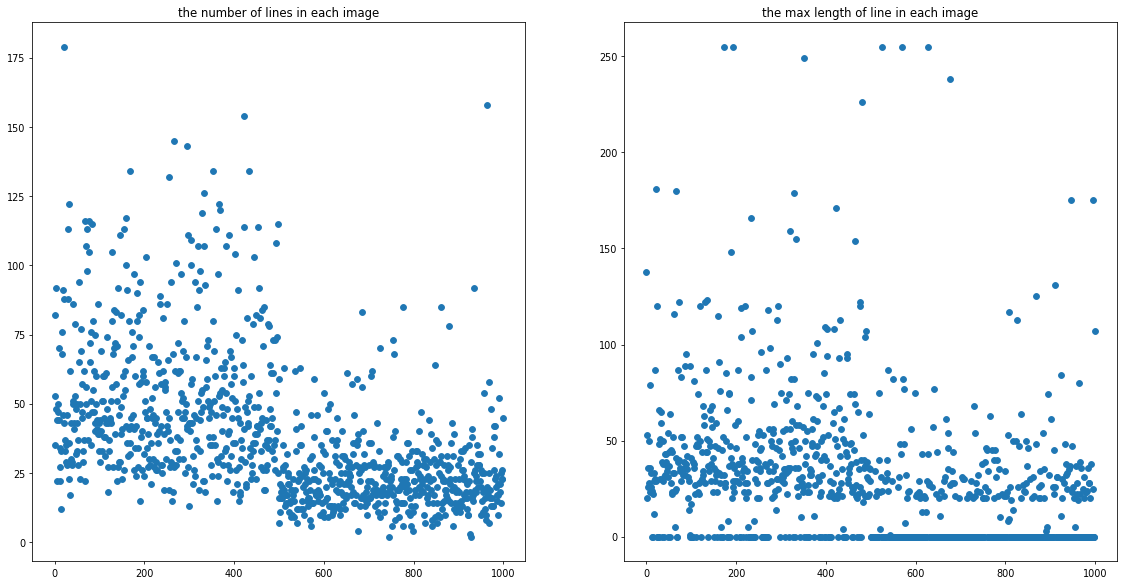

In [16]:
fig,ax = plt.subplots(1,2,figsize=(20,10),dpi=70)
ax[0].scatter(x=range(0,1000),y=X_train_hough)
ax[0].set_title('the number of lines in each image')
ax[1].scatter(x=range(0,1000),y=X_train_hough_len)
ax[1].set_title('the max length of line in each image')

In [81]:
import pandas as pd
X_train_hough_2 = pd.DataFrame(X_train_hough,columns=['number of lines'])
X_train_hough_2["max length of line"] = X_train_hough_len
X_test_hough_2 = pd.DataFrame(X_test_hough,columns=['number of lines'])
X_test_hough_2["max length of line"] = X_test_hough_len
X_comp_hough_2 = pd.DataFrame(X_comp_hough,columns=['number of lines'])
X_comp_hough_2["max length of line"] = X_comp_hough_len
# X_test_hough_2.head(20)


In [18]:
# X_test_hough_2.tail(20)

,number of lines,max length of line
480,14,0
481,20,30
482,6,0
483,10,0
484,11,0
485,34,0
486,14,0
487,37,39
488,17,0
489,9,0


线性回归: 线段条数 0.764

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##线性回归
model = LinearRegression()
model.fit(np.array(X_train_hough).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = model.predict(np.array(X_test_hough).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))



0.764
[[160  90]
 [ 28 222]]


In [90]:
##线性回归, x_train_hough ^ 2
model = LinearRegression()
model.fit(np.square(np.array(X_train_hough)).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = model.predict(np.square(np.array(X_test_hough)).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))

0.726
[[123 127]
 [ 10 240]]


In [91]:
##线性回归, log(x_train_hough )
model = LinearRegression()
model.fit(np.log(np.array(X_train_hough)+1.1).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = model.predict(np.log(np.array(X_test_hough)+1.1).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))

0.798
[[198  52]
 [ 49 201]]


In [94]:
from sklearn.linear_model import LogisticRegression
#逻辑回归
model1 = LogisticRegression()
model1.fit(np.log(np.array(X_train_hough)+1.1).reshape(-1,1),np.array(y_train))
hough_pred1 = []
pred_hough1 = model1.predict(np.log(np.array(X_test_hough)+1.1).reshape(-1,1))
for i in range(0,len(pred_hough1)):
  if pred_hough1[i] >= 0.5:
    hough_pred1.append(1)
  else:
    hough_pred1.append(0)

print(accuracy_score(hough_pred1,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred1))

0.798
[[198  52]
 [ 49 201]]


线性回归: 线段最长长度 0.644 -> 0.686 ；逻辑回归 0.65 -> 0.706

In [95]:
##线性回归 x
lr_max = LinearRegression()
lr_max.fit(np.array(X_train_hough_len).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = lr_max.predict(np.array(X_test_hough_len).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))



0.686
[[149 101]
 [ 56 194]]


In [96]:
##线性回归 x^2
lr_max = LinearRegression()
lr_max.fit(np.square(np.array(X_train_hough_len)).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = lr_max.predict(np.square(np.array(X_test_hough_len)).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))



0.606
[[ 77 173]
 [ 24 226]]


In [97]:
##线性回归 log(x)
lr_max = LinearRegression()
lr_max.fit(np.log(np.array(X_train_hough_len)+1.1).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = lr_max.predict(np.log(np.array(X_test_hough_len)+1.1).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))



0.714
[[201  49]
 [ 94 156]]


In [22]:
##逻辑回归
lr_max = LogisticRegression()
lr_max.fit(np.array(X_train_hough_len).reshape(-1,1),np.array(y_train))
hough_pred = []
pred_hough = lr_max.predict(np.array(X_test_hough_len).reshape(-1,1))
for i in range(0,len(pred_hough)):
  if pred_hough[i] >= 0.5:
    hough_pred.append(1)
  else:
    hough_pred.append(0)

print(accuracy_score(hough_pred,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred))



0.706
[[170  80]
 [ 67 183]]


多元线性回归: log线段条数+最长线段 0.76 -> 0.754

In [82]:
#标准化
X_train_hough_2_ = X_train_hough_2.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
X_test_hough_2_ = X_test_hough_2.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
X_comp_hough_2_ = X_comp_hough_2.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))

In [103]:
X_train_hough_log = np.log(X_train_hough_2+1.1)
X_test_hough_log = np.log(X_test_hough_2+1.1)
X_comp_hough_log = np.log(X_comp_hough_2+1.1)
X_train_hough_log_std = X_train_hough_log.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
X_test_hough_log_std = X_test_hough_log.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
X_comp_hough_log_std = X_comp_hough_log.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))

In [107]:
lr = LinearRegression()
lr.fit(X=X_train_hough_log_std.loc[:,],y=np.array(y_train))
hough_pred2 = []
pred_hough2 = lr.predict(X_test_hough_log_std.loc[:,])
for i in range(0,len(pred_hough2)):
  if pred_hough2[i] >= 0.5:
    hough_pred2.append(1)
  else:
    hough_pred2.append(0)

print(accuracy_score(hough_pred2,np.array(y_test)))
print(confusion_matrix(np.array(y_test),hough_pred2))
print(lr.coef_)

0.754
[[151  99]
 [ 24 226]]
[-1.71439375 -0.24827138]


---
### Hough调参

#### 调参: for max length

manmade最长线段长/nature最长线段长：越大越好

In [25]:
#threshold, maxLineGap
#target = tar1/tar2 #越大越好
#调参for hough线段max length

def findLengthPara_getTarget (test_set,templist,threshold2,maxLineGap2):
  for i in range(0,len(test_set)):
    lines_for_length = cv2.HoughLinesP(test_set[i], 1, np.pi/180, threshold2, 100, maxLineGap2)
    max_length = 0 #曼哈顿距离
    if lines_for_length is not None:
      for line in lines_for_length:
        x1 = line[0][0]
        y1 = line[0][1]
        x2 = line[0][2]
        y2 = line[0][3]
        temp = y2-y1+x2-x1
        if temp > max_length:
          max_length = temp
      
    templist.append(max_length)
  
  #manmade最长线段长/nature最长线段长：越大越好
  tar1 = np.mean(templist[0:len(test_set)//2])/np.mean(templist[len(test_set)//2:])
  # #manmade,0的个数 / nature, 0的个数：越小越好
  # tar2 = np.sum(np.where(templist[0:len(test_set)//2],0,1))/np.sum(np.where(templist[len(test_set)//2:],0,1))
  return tar1



In [26]:
# #找参数 for hough线段max length
# t2 = range(15,22)
# m2 = range(15,21)

# test_set = X_train_edge
# max_tar = 0
# para = [0,0] #最优参数

# for tt2 in t2:
#   for mm2 in m2:
#     templist = []
#     tar_ = findLengthPara_getTarget(test_set,templist,tt2,mm2)
#     if(tar_ > max_tar):
#       max_tar = tar_
#       para[0] = tt2
#       para[1] = mm2

# print(max_tar)
# print(para)

#--------------
#2.642351186777681
# [15, 20]

2.642351186777681
[15, 20]


X_test_edge :19 [21,15] 

X_train_edge: 24.22186464742073 [17, 15]

(如果只考虑tar1，使得tar1最大：tar1 : 2.642351186777681 [15, 20]

#### 调参: for number of length

manmade number of length /nature number of length：越大越好

In [27]:
# def findNumPara_getTarget (test_set,templist,threshold1,maxLineGap1):
#   for i in range(0,len(test_set)):
#     lines = cv2.HoughLinesP(test_set[i], 1, np.pi/180, threshold1, 100, maxLineGap1)
#     if lines is not None:
#       templist.append(len(lines))
#     else:
#       templist.append(0)
  
#   tar = np.mean(templist[0:len(test_set)//2])/np.mean(templist[len(test_set)//2:])
#   return tar

In [28]:
# #找参数 for hough线段numbers
# t1 = range(5,20)
# m1 = range(5,15)

# test_set = X_train_edge[300:700]
# max_tar_ = 0
# para_ = [0,0] #最优参数

# for tt2 in t1:
#   for mm2 in m1:
#     templist = []
#     tar_ = findLengthPara_getTarget(test_set,templist,tt2,mm2)
#     if(tar_ > max_tar_):
#       max_tar_ = tar_
#       para_[0] = tt2
#       para_[1] = mm2

# print(max_tar_)
# print(para_)
# #2.216495354566654
#----
# 2.214923153197818
# [11, 14]

2.214923153197818
[11, 14]


---
## 灰度共生矩阵

---
## Image Contribution

------

## define distance between 

### 颜色直方图HSV 相关系数

In [29]:
# img_1 = cv2.imread("natural_test/sun_afpvabrzdbgikrkm.jpg")
# img_2 = cv2.imread("natural_test/sun_agqzpwvtcowssfih.jpg")
# img_3 = cv2.imread("manmade_training/sun_bpiitgmvcfwbswrt.jpg")

In [30]:
# def create_hsv_hist(image,histSize):
#   histSize = histSize
#   histRange = (0, 256)  
#   h,s,v = cv2.split(cv2.cvtColor(image,cv2.COLOR_RGB2HSV)) 
#   h_hist = cv2.calcHist([h], [0], None, [histSize], histRange)
#   s_hist = cv2.calcHist([s], [0], None, [histSize], histRange)
#   v_hist = cv2.calcHist([v], [0], None, [histSize], histRange)
#   hist = np.vstack((h_hist,s_hist,v_hist))
#   return hist

# def create_rgb_hist(image,histSize):
#   histSize = histSize
#   histRange = (0, 256)  
#   h,s,v = cv2.split(image) 
#   h_hist = cv2.calcHist([h], [0], None, [histSize], histRange)
#   s_hist = cv2.calcHist([s], [0], None, [histSize], histRange)
#   v_hist = cv2.calcHist([v], [0], None, [histSize], histRange)
#   hist = np.vstack((h_hist,s_hist,v_hist))
#   return hist

# def hist_compare_hsv_corr(img1,img2,histSize):
#   hist1 = create_hsv_hist(img1,histSize)
#   hist2 = create_hsv_hist(img2,histSize)
#   return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

# def hist_compare_rgb_corr(img1,img2,histSize):
#   hist1 = create_rgb_hist(img1,histSize)
#   hist2 = create_rgb_hist(img2,histSize)
#   return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)



## GIST特征


https://www.jianshu.com/p/9277814e5ade

In [31]:
'''  
a image to bgr format 
'''   
def img_2bgr(np_img_in, run_log=None, b_print=False):
    if np_img_in is None:
        return None, -3 

    np_img_bgr = None # if raw image is uint16 so conver to uint8 
    if len(np_img_in.shape) == 3 and np_img_in.shape[2] == 3: # Raw Image is BGR imge, so continue
        np_img_bgr = np_img_in
    elif len(np_img_in.shape) == 3 and np_img_in.shape[2] == 4: # Raw Image is BGRA imge, there are different situation to solve
        h, w, c = np_img_in.shape
        np_img_bgr_1 = cv2.cvtColor(np_img_in, cv2.COLOR_BGRA2BGR)    
        b, g, r, a = cv2.split(np_img_in)
        b = cv2.convertScaleAbs(b, alpha=(255.0/65535.0)) # (b/256).astype('uint8')
        g = cv2.convertScaleAbs(g, alpha=(255.0/65535.0))
        r = cv2.convertScaleAbs(r, alpha=(255.0/65535.0))
        a = cv2.convertScaleAbs(a, alpha=(255.0/65535.0))
        new_img  = cv2.merge((b, g, r))
        not_a = cv2.bitwise_not(a)
        not_a = cv2.cvtColor(not_a, cv2.COLOR_GRAY2BGR) 
        new_img = cv2.bitwise_and(new_img, new_img, mask = a)
        np_img_bgr_2 = cv2.add(new_img, not_a) 
        np_img_gray_1 = cv2.cvtColor(cv2.convertScaleAbs(np_img_bgr_1, alpha=(255.0/65535.0)), cv2.COLOR_BGR2GRAY) # Which image has most not white
        np_img_gray_2 = cv2.cvtColor(np_img_bgr_2, cv2.COLOR_BGR2GRAY)
        n_info_1 = len(np.unique(np_img_gray_1))
        n_info_2 = len(np.unique(np_img_gray_2))    
        np_img_bgr = np_img_bgr_1 if n_info_1 >= n_info_2 else np_img_bgr_2
    elif len(np_img_in.shape) == 3 and np_img_in.shape[2] == 1: # Raw Image is gray image
        np_img_bgr = np.tile(np_img_in, (1, 1, 3))     # 256x256x1 ==> 256x256x3
    elif len(np_img_in.shape) == 2:
        np_img_bgr = np.tile(np_img_in, (3, 1, 1))     # 256x256 ==> 3x256x256
        np_img_bgr = np.transpose(np_img_bgr, (1, 2, 0))  # 3x256x256 ==> 256x256x3
    return np_img_bgr, 0
    
''' 
Convert raw image to small gray image, resize is  n_resize * n_resize 
''' 
def img_2gray(np_img_raw, run_log=None, b_print=False):
    if np_img_raw is None:
        s_msg = "input image null"
        run_log and run_log.error(s_msg)
        b_print and print(s_msg)
        return None, -3
    np_img_gray = None # Raw Image is BGR imge, so convert rgb to gray
    if len(np_img_raw.shape) == 3 and np_img_raw.shape[2] == 3:
        np_img_gray = cv2.cvtColor(np_img_raw, cv2.COLOR_BGR2GRAY) 
    elif len(np_img_raw.shape) == 3 and np_img_raw.shape[2] == 4: # Raw Image is BGRA imge, there are different situation to solve
        n_sence = 3
        np_img_gray_choose = np.zeros([np_img_raw.shape[0], np_img_raw.shape[1], n_sence], dtype=np.uint8)

        np_img_gray_choose[:, :, 0] = 255 - np_img_raw[:, :, 3]
        np_img_gray_choose[:, :, 1] = cv2.cvtColor(np_img_raw, cv2.COLOR_BGRA2GRAY)
        np_img_gray_choose[:, :, 2] = cv2.cvtColor(np_img_raw[:, :, 0:3], cv2.COLOR_BGR2GRAY)
   
        ln_sence_non0_num = [] # Get nonzero element of every resize gray
        for i in range(n_sence):
            ln_sence_non0_num.append(len(np_img_gray_choose[:, :, i].nonzero()[0]))  
        if len(set(ln_sence_non0_num)) > 1: # Which image has most nonzero element
            n_max_index = ln_sence_non0_num.index(max(ln_sence_non0_num))
            np_img_gray = np_img_gray_choose[:, :, n_max_index]
        else: # Which image has most different element
            ln_diff_pix_num = []
            for i in range(n_sence):
                ln_diff_pix_num.append(len(np.unique(np_img_gray_choose[:, :, i])))
            n_max_index = ln_diff_pix_num.index(max(ln_diff_pix_num))
            np_img_gray = np_img_gray_choose[:, :, n_max_index] 
    elif len(np_img_raw.shape) == 3 and np_img_raw.shape[2] == 1: # Raw Image is gray image
        np_img_gray = np_img_raw[:, :, 0]
    elif len(np_img_raw.shape) == 2:
        np_img_gray = np_img_raw
    return np_img_gray, 0


''' 
resize a image 
'''     
def img_resize(np_img_in, ln_resize, run_log=None, b_print=False):
    try:
        np_img_resize = cv2.resize(np_img_in, ln_resize, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        return np_img_resize, 0
    except Exception as e:
        s_msg = 'resize err:%s' % str(e)
        run_log and run_log.error(s_msg)
        b_print and print(s_msg)
        return None, -3

In [32]:
class GistUtils:
    def __init__(self, n_resize=128, n_w=5, ln_orientation=[8, 8, 8, 8], n_block_num=4, n_prefilt=4):
        # vector dim(single chanle) = sum(ln_orientation) * n_block_num * n_block_num
        # (8+8+8+8)*(4*4) = 512
        self.n_resize = n_resize
        self.n_boundaryExtension = self.n_resize // 4
        self.n_w = n_w    
        self.ln_orientation = ln_orientation
        self.n_block_num = n_block_num  # MUST n_resize % n_block_num == 0
        self.n_prefilt = n_prefilt
             
        self.__create_gabor()
        self.__get_gfmat()
        
    def get_gist_vec(self, np_img_raw, mode="rgb"):
        # resize 
        np_img_resize, n_ret = img_resize(np_img_raw, (self.n_resize, self.n_resize))
        if n_ret != 0:
            print("image resize error")
            return None

        # convert gray or rgb
        np_gist = None
        if mode.lower() == "gray":
            np_img_gray, n_ret = img_2gray(np_img_resize)
            np_prefilt_img = self.__get_pre_filt(np_img_gray)
            np_gist = self.__gist_main(np_prefilt_img)

        elif mode.lower() == "rgb" or mode.lower() == "bgr":
            np_img_bgr, n_ret = img_2bgr(np_img_resize)
            
            np_img_b = np_img_bgr[:,:,0]
            np_img_g = np_img_bgr[:,:,1]
            np_img_r = np_img_bgr[:,:,2]

            np_gist_b = self.__get_pre_filt(np_img_b)
            np_gist_g = self.__get_pre_filt(np_img_g)
            np_gist_r = self.__get_pre_filt(np_img_r)

            np_gist_b = self.__gist_main(np_gist_b)
            np_gist_g = self.__gist_main(np_gist_g)
            np_gist_r = self.__gist_main(np_gist_r)


            np_gist = np.hstack([np_gist_b, np_gist_g, np_gist_r])
        else:
            print("input mode error")
        
        return np_gist
    
    def __get_pre_filt(self, np_img): 
        np_log_img = np.log(np_img + 1.0)
        np_pad_img = np.pad(np_log_img,((self.n_w,self.n_w), (self.n_w,self.n_w)), 'symmetric')

        np_gf = self.np_gf
        np_out = np_pad_img - np.real(np.fft.ifft2(np.fft.fft2(np_pad_img) * np_gf ))
        
        np_local = np.sqrt(np.abs(np.fft.ifft2(np.fft.fft2(np_out **2) * np_gf)))
        np_out = np_out / (0.2 + np_local)
        
        n_size = self.n_resize + 2 * self.n_w
        
        return np_out[self.n_w: n_size - self.n_w, self.n_w : n_size - self.n_w]
    
    def __gist_main(self, np_prefilt_img):
        
        n_b = self.n_boundaryExtension
        np_pad_img = np.pad(np_prefilt_img, ((n_b, n_b), (n_b, n_b)), 'symmetric')
        np_fft2_img = np.fft.fft2(np_pad_img)
        
    
        n_filter = self.np_gabor.shape[2]      
        n_size = self.np_gabor.shape[0]
        lf_gist = []
        for i in range(n_filter):
            np_res = np.abs(np.fft.ifft2( np_fft2_img * self.np_gabor[:,:,i] ))
            
            np_res = np_res[n_b: n_size - n_b, n_b : n_size - n_b]
            
            lf_filter_res = self.__down_sampling(np_res)      
            lf_gist = lf_gist + lf_filter_res
        
        np_gist = np.asarray(lf_gist)
        return np_gist[np.newaxis,:]
    
    def __create_gabor(self):
        n_gabor_size = self.n_resize + 2 * self.n_boundaryExtension
        ln_or = self.ln_orientation
        
        n_scales = len(ln_or)
        n_filters = sum(ln_or)
        
        np_param = np.zeros((n_filters, 4), dtype = np.float64)
        n_index = 0
        for i in range(n_scales):
            for j in range(0, ln_or[i]):
                np_param[n_index, 0] = 0.35
                np_param[n_index, 1] = 0.3 / (1.85**i)
                np_param[n_index, 2] = 16 *(ln_or[i]**2)/(32**2)
                np_param[n_index, 3] = np.pi/ln_or[i] * j
                
                n_index += 1
         
     
        np_linear = np.linspace(-n_gabor_size//2, n_gabor_size//2-1, n_gabor_size)
        np_fx, np_fy = np.meshgrid(np_linear, np_linear)
        np_res_A = np.fft.fftshift(np.sqrt(np_fx ** 2 + np_fy**2))
        np_res_B = np.fft.fftshift(np.angle(np_fx + 1j*np_fy))
        
        self.np_gabor = np.zeros((n_gabor_size, n_gabor_size, n_filters), dtype = np.float64)
        for i in range(n_filters):
            np_tr = np_res_B + np_param[i,3]
            np_A  = (np_tr < -np.pi) + 0.0
            np_B  = (np_tr > np.pi) + 0.0
            
            np_tr = np_tr + 2 *np.pi * np_A - 2*np.pi*np_B
            np_every_gabor = np.exp(-10 * np_param[i,0] * ((np_res_A / n_gabor_size /np_param[i,1] - 1) **2) - 2*np_param[i,2]*np.pi*(np_tr **2))
            
            self.np_gabor[:,:,i] = np_every_gabor
            
            
    
    def __get_gfmat(self):
        n_s1 = self.n_prefilt /np.sqrt(np.log(2))
        n_boundray = self.n_resize + 2 * self.n_w
         
        np_linear = np.linspace(-n_boundray//2, n_boundray//2-1, n_boundray)
        np_fx, np_fy = np.meshgrid(np_linear, np_linear)
        
#        np_gf = np.fft.fftshift(np.exp( -(np_fx **2 + np_fy **2)/(n_s1 ** 2)))
        self.np_gf = np.fft.fftshift(np.exp( -(np_fx **2 + np_fy **2)/(n_s1 ** 2)))
           
    def __down_sampling(self, np_img):
        np_index = np.linspace(0, self.n_resize, self.n_block_num + 1, dtype = np.int)
        ln_data = []
        for i in range(self.n_block_num):
            for j in range(self.n_block_num):
                np_zone = np_img[np_index[i]: np_index[i+1] , np_index[j]: np_index[j+1]]
                np_zone = np_zone.T.reshape(-1)
#                n_res = np.median(np_zone)
                n_res = np.max(np_zone)
                ln_data.append(n_res)
        return ln_data

gist 缓存（所有图片得gist向量） 

In [33]:
#######################################################################
gist_helper = GistUtils()
X_train_gist_ = []
for i in range(0,len(X_train)):
  X_train_gist_.append(gist_helper.get_gist_vec(X_train[i]))

X_test_gist_ = []
for i in range(0,len(X_test)):
  X_test_gist_.append(gist_helper.get_gist_vec(X_test[i]))


C:\Users\61422\AppData\Local\Temp\ipykernel_34260\3364295990.py:134: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_index = np.linspace(0, self.n_resize, self.n_block_num + 1, dtype = np.int)


In [35]:
X_comp_gist_ = []
for i in range(0,len(X_comp)):
  X_comp_gist_.append(gist_helper.get_gist_vec(X_comp[i]))

C:\Users\61422\AppData\Local\Temp\ipykernel_34260\3364295990.py:134: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_index = np.linspace(0, self.n_resize, self.n_block_num + 1, dtype = np.int)


---
## KNN

In [36]:
# import numpy as np

# gist_helper = GistUtils()
# """
# 欧式距离
# """
# def distanceFunc(metric_type, vec1, vec2):
#     """
#     Computes the distance between two d-dimension vectors.

#     Please DO NOT use Numpy's norm function when implementing this function.

#     Args:
#         metric_type (str): Metric: L1, L2, or L-inf
#         vec1 ((d,) np.ndarray): d-dim vector
#         vec2 ((d,)) np.ndarray): d-dim vector

#     Returns:
#         distance (float): distance between the two vectors
#     """

#     diff = vec1 - vec2
#     if metric_type == "L1":
#         # distance = np.linalg.norm(diff, ord=1)
#         distance = abs(diff).sum()

#     if metric_type == "L2":
#         distance = np.sum(diff ** 2) ** 0.5
#         # distance = np.linalg.norm(diff, ord=2)

#     if metric_type == "L-inf":
#         # distance = max(abs(diff))
#         distance = np.linalg.norm(diff, ord=np.inf)
    
#     if metric_type == "cos":
#         distance = np.dot(vec1,vec2.T)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

#     return distance

  
# def computeDistancesNeighbors(K, metric_type, X_train, y_train, sample):
#     """
#     Compute the distances between every datapoint in the train_data and the
#     given sample. Then, find the k-nearest neighbors.

#     Return a numpy array of the label of the k-nearest neighbors.

#     Args:
#         K (int): K-value
#         metric_type (str): metric type
#         X_train ((n,p) np.ndarray): Training data with n samples and p features
#         y_train : Training labels
#         sample ((p,) np.ndarray): Single sample whose distance is to computed with every entry in the dataset

#     Returns:
#         neighbors (list): K-nearest neighbors' labels
#     """
    

#     dis_sample_Xtrain = np.zeros(shape=len(X_train))
#     for i in range(0, len(X_train)):
#         # dis_sample_Xtrain[i] = SIFT_similarity(img1=X_train[i], img2=sample) #SIFT rate
#         dis_sample_Xtrain[i] = distanceFunc(metric_type,X_train[i],sample) 
#         # if i in less_weight_index:
#         #   dis_sample_Xtrain[i] = dis_sample_Xtrain[i]*1.03

#     K_index = np.argsort(dis_sample_Xtrain, kind='stable')[:K]
#     neighbors = y_train[K_index]
#     return neighbors,K_index


# def Majority(neighbors,target_hough,hough_weight=0.472):
#     """
#     Performs majority voting and returns the predicted value for the test sample.

#     Since we're performing binary classification the possible values are [0,1].

#     Args:
#         neighbors (list): K-nearest neighbors' labels

#     Returns:
#         predicted_value (int): predicted label for the given sample
#     """


#     t = np.mean(neighbors)*(1-hough_weight) + model.predict(np.array(target_hough).reshape(-1,1))[0]*hough_weight
#     if t < 0.5:
#       return 0
#     else:
#         return 1
#     # b = np.bincount(neighbors)
#     # predicted_value = np.argmax(b)

#     return predicted_value


# def KNN(K, metric_type, X_train, y_train, X_val,hough_weight):
#     """
#     Returns the predicted values for the entire validation or test set.

#     Please DO NOT use Scikit's KNN model when implementing this function.

#     Args:
#         K (int): K-value
#         metric_type (str): metric type
#         X_train ((n,p) np.ndarray): Training data with n samples and p features
#         y_train : Training labels
#         X_val ((n, p) np.ndarray): Validation or test data

#     Returns:
#         predicted_values (list): output for every entry in validation/test dataset
#     """

#     predictions = []
#     K_neighbor_index = []
#     for i in range(0, len(X_val)):
#         ns,K_index = computeDistancesNeighbors(K, metric_type= metric_type, X_train=X_train, y_train=y_train, sample=X_val[i])
#         predictions.append(Majority(ns,X_test_hough[i],hough_weight=hough_weight))
#         K_neighbor_index.append(K_index)

#     return predictions,K_neighbor_index


# def evaluation(predicted_values, actual_values):
#     """
#     Computes the accuracy of the given datapoints.

#     Args:
#         predicted_values ((n,) np.ndarray): Predicted values for n samples
#         actual_values ((n,) np.ndarray): Actual values for n samples

#     Returns:
#         accuracy (float): accuracy
#     """
#     acc = np.sum(predicted_values == actual_values) / len(predicted_values)
#     return acc


# def find_misclass(predicted_values, actual_values,K_neighbor_index):
#     list_minus = [predicted_values[i] - actual_values[i] for i in range(0,len(predicted_values))]
#     mis_index = [i for i,x in enumerate(list_minus) if x!=0]
#     misimg_kneighbor_index = []
#     for i in range(0,len(mis_index)):
#       misimg_kneighbor_index.append(K_neighbor_index[mis_index[i]])
    
#     return mis_index,misimg_kneighbor_index
    





In [37]:
# def show_mis_img(mis_index,mis_knn_index):
#   r = len(mis_index)
#   c = 1+len(mis_knn_index[0])
#   fig,ax = plt.subplots(r,c,figsize=(50,30),dpi=100)
#   for i in range(len(mis_index)):
#     ax[i][0].set_title("target label: "+ str(y_test[mis_index[i]]))
#     ax[i][0].imshow(X_test[mis_index[i]])
#     for j in range(1, len(mis_knn_index[i])+1):
#       ax[i][j].set_title("neighbor label: "+str(y_train[mis_knn_index[i][j-1]]))
#       ax[i][j].imshow(X_train[mis_knn_index[i][j-1]])
  

TEST1: GIST

In [38]:
# predictions,K_neighbor_index = KNN(3,metric_type="L2" ,X_train=X_train_gist_,y_train=np.array(y_train),X_val=X_test_gist_,hough_weight=0.48)
# print("accuracy rate: " + str(evaluation(predicted_values=predictions,actual_values=np.array(y_test))))
# print(confusion_matrix(y_true=y_test,y_pred=predictions))
# mis_index, mis_knn_index = find_misclass(predictions,np.array(y_test),K_neighbor_index)

# # for i in range(0,len(mis_index)):
# #   print("misclassification index of X_test and pred: "+ str(mis_index[i]) + "(" + str(predictions[mis_index[i]]) +"), its Knn neighbors' indexs in X_train are: "+ str(mis_knn_index[i]))

accuracy rate: 0.862

[[220  30]

 [ 39 211]]

TEST2: COMPETITION

In [39]:
# predictions_comp,K_neighbor_index_comp = KNN(3,metric_type="L2" ,X_train=X_train_gist_,y_train=np.array(y_train),X_val=X_comp_gist_,hough_weight=0.48)

In [40]:
# import pandas as pd
# comp_df = pd.DataFrame(predictions_comp)
# comp_df.to_csv("competition_pred.csv")

分析 - 寻找导致分类错误的“training img”

In [41]:
# mis_index_list = []
# for i in range(0,len(mis_index)):
#   for j in range(0,len(mis_knn_index[i])):
#     mis_index_list.append(mis_knn_index[i][j])

In [42]:
# set_=set(mis_index_list)
# dict={}
# for item in set_:
#   count = 0
#   for i in range(0,len(mis_index_list)):
#     if mis_index_list[i] == item:
#       count += 1
  
#     dict.update({item:count})


In [43]:
# import pandas as pd
# mis_df = pd.DataFrame(dict,index=[0])
# mis_df = mis_df.T
# mis_df.sort_values(by=0,ascending=False).head(10)

从mis-classification中，比较频繁出现的【错误的neighbor】：


461	6

209	4

644	4

138	3

901	3




In [44]:
# show_mis_img([mis_index[i] for i in [35,51,53,55,57,62]], [mis_knn_index[i] for i in [35,51,53,55,57,62]])

In [45]:
# show_mis_img([mis_index[i] for i in [53,56,59,16,17,19]], [mis_knn_index[i] for i in[8,11,14,16,17,19]])

1. rgb张量L2距离(K=2)跑全部的：3m41.9s 正确率为0.57


2. gist(K=9,L2) : 0.85； L1,L2,L-inf差不多，cos不行！

In [46]:
## 调参， weight-step

# weight_step = np.linspace(0.4,0.6,num=20)

# print("<<<<VALIDATION DATA PREDICTIONS>>>>")

# ## Complete
# for i in range(0,len(weight_step)):
#     pred,n = KNN(3,metric_type='L2',X_train=X_train_gist_,y_train=np.array(y_train),X_val=X_test_gist_,hough_weight=weight_step[i])
#     print("weight: ", weight_step[i], " evaluation: ",evaluation(pred,np.array(y_test)))

## Optimized- KNN

1. 用霍夫变换检测出来的线段数量，辅助GIST的KNN分类

In [47]:
# plt.plot(np.array(X_test_hough)[mis_index])
# ##横坐标是错误分类的index，前36是manmade的错误分类，后面的是natural的错误分类
# ##纵坐标是hough线段数

In [83]:
#准备`X_train_hough_set`作为fit的入参, `X_train_gist_`作为fit的gist入参
X_train_hough_set = []
for i in range(0,len(X_train_hough)):
  X_train_hough_set.append(np.array([X_train_hough_2_.iat[i,0],X_train_hough_2_.iat[i,1]]))

X_test_hough_set = []
for i in range(0,len(X_test_hough)):
  X_test_hough_set.append(np.array([X_test_hough_2_.iat[i,0],X_test_hough_2_.iat[i,1]]))

X_comp_hough_set = []
for i in range(0,len(X_comp_hough)):
  X_comp_hough_set.append(np.array([X_comp_hough_2_.iat[i,0],X_comp_hough_2_.iat[i,1]]))


gist和hough两者之间不存在“量纲”的影响

In [49]:
gist_train_df = pd.DataFrame(np.array(X_train_gist_).reshape(1000,-1))
gist_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.187048,0.188839,0.193022,0.191853,0.261574,0.280349,0.286015,0.269198,0.305468,0.317102,...,0.105787,0.100343,0.110335,0.116141,0.112041,0.109147,0.096460,0.099853,0.098852,0.097443
std,0.159445,0.151793,0.155327,0.165683,0.158091,0.150698,0.155544,0.159944,0.151884,0.142831,...,0.050356,0.049235,0.049865,0.051765,0.049746,0.049215,0.047284,0.049388,0.047420,0.048638
min,0.002889,0.003137,0.000783,0.001497,0.005833,0.007010,0.008451,0.007874,0.013514,0.013875,...,0.009248,0.006504,0.019194,0.007811,0.010973,0.011196,0.008132,0.003542,0.003759,0.006153
25%,0.037250,0.052530,0.053583,0.034309,0.131880,0.164445,0.172075,0.141066,0.193483,0.216751,...,0.070491,0.062969,0.072879,0.078932,0.077218,0.073885,0.062757,0.065942,0.065153,0.059189
50%,0.168354,0.168436,0.170933,0.167504,0.248359,0.270117,0.275966,0.262291,0.291553,0.315080,...,0.099125,0.095499,0.104957,0.109495,0.106415,0.103582,0.091370,0.094649,0.094418,0.092613
75%,0.302571,0.288713,0.294866,0.303819,0.362208,0.372938,0.386091,0.378860,0.412096,0.408346,...,0.136220,0.130369,0.141813,0.148412,0.141122,0.139631,0.125358,0.130129,0.127891,0.128814
max,0.975140,0.801890,0.871992,0.866672,0.766913,0.829069,0.929429,0.872927,0.818031,0.801120,...,0.312654,0.298253,0.286269,0.301811,0.285843,0.307046,0.276026,0.282924,0.294284,0.290858


In [50]:
class MyKNN:

  def __init__(self,K=3,weight_gist= 0.85/(0.85+0.75)):
    self.weight_gist = weight_gist
    self.K = K
    pass

  """fit: normalized后输入, 输入变量都化成list(np.ndarray)"""
  def fit(self,training_gist_set,training_hough_set,training_y):
    self.training_gist_set = training_gist_set
    self.training_hough_set = training_hough_set
    self.training_y = training_y
  
  def computeDistance(self,training_gist_v,training_hough_v,target_gist_vector,target_hough_vector):
    diff1 = np.sum((training_gist_v-target_gist_vector) ** 2) ** 0.5
    diff2 = np.sum((training_hough_v-target_hough_vector) ** 2) ** 0.5
    # diff2 = np.linalg.norm(training_hough_v-target_hough_vector,'L2')
    dis = self.weight_gist*diff1 + (1-self.weight_gist)*diff2
    return dis

  def getNeighbor(self,target_gist_vector,target_hough_vector):
    sample_dis_to_train = np.zeros(shape=len(self.training_gist_set))
    for i in range(0,len(self.training_gist_set)):
      sample_dis_to_train[i] = self.computeDistance(training_gist_v=self.training_gist_set[i],training_hough_v=self.training_hough_set[i],target_gist_vector=target_gist_vector,target_hough_vector=target_hough_vector)
    
    K_index = np.argsort(sample_dis_to_train,kind='stable')[:self.K]
    neighbors = self.training_y[K_index]
    return neighbors

  def majority(self, neighbors):
    b = np.bincount(neighbors)
    return np.argmax(b)

  def predict(self,target_gist_set,target_hough_set):
    target_predictions = []
    for i in range(0,len(target_gist_set)):
      ns = self.getNeighbor(target_gist_vector=target_gist_set[i],target_hough_vector=target_hough_set[i])
      res = self.majority(neighbors=ns)
      target_predictions.append(res)
    return target_predictions
  



In [51]:
knn = MyKNN(weight_gist = 84.2/(79.2+84.2))
knn.fit(X_train_gist_,X_train_hough_set,np.array(y_train))
pred_myknn = knn.predict(X_test_gist_,X_test_hough_set)
print(accuracy_score(y_true=y_test,y_pred=pred_myknn))
print(confusion_matrix(y_true=y_test,y_pred=pred_myknn))

0.866
[[222  28]
 [ 39 211]]


自定义距离的myKNN: 0.866

参数：

- K = 3
- metric = L2
- weight_gist 84.2/(79.2+84.2)

hough:
- threshold1 = 7
- maxLineGap1 = 7.4
- threshold2 = 15
- maxLineGap2 = 20


In [52]:
84.2/(79.2+84.2)

0.5152998776009792

In [53]:
knn = MyKNN(K=8,weight_gist = 84.2/(79.2+84.2))
knn.fit(X_train_gist_,X_train_hough_set,np.array(y_train))
pred_myknn = knn.predict(X_test_gist_,X_test_hough_set)
print(accuracy_score(y_true=y_test,y_pred=pred_myknn))
print(confusion_matrix(y_true=y_test,y_pred=pred_myknn))
# K增加, FN增加, manmade更容易成为neighbor？

0.866
[[228  22]
 [ 45 205]]


In [54]:
knn = MyKNN(K=8, weight_gist = 0)
knn.fit(X_train_gist_,X_train_hough_set,np.array(y_train))
pred_myknn = knn.predict(X_test_gist_,X_test_hough_set)
print(accuracy_score(y_true=y_test,y_pred=pred_myknn))
print(confusion_matrix(y_true=y_test,y_pred=pred_myknn))
# 当weight减小，更考虑线条的重要性时，FN增加，hough似乎更容易把manmade作为neighbor

0.796
[[219  31]
 [ 71 179]]


### Emsemble for multiple KNNs

In [78]:
def emsemlble_knn(X_train_gist,X_train_hough_set,y_train,X_test_gist,X_test_hough_set,K_list=[3,5,7],weight_gist = 84.2/(79.2+84.2)):
  pred = []
  for i in range(0,len(K_list)):
    knn = MyKNN(K=K_list[i],weight_gist = weight_gist)
    knn.fit(X_train_gist,X_train_hough_set,np.array(y_train))
    pred_myknn = knn.predict(X_test_gist,X_test_hough_set)
    pred.append(np.array(pred_myknn))
  
  sum_pred = np.zeros(len(X_test_gist))
  for l in range(0,len(pred)):
    sum_pred = sum_pred + pred[i]

  predict = np.round(sum_pred/len(K_list))

  return predict

  
  

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
predict_em = emsemlble_knn(X_train_gist_,X_train_hough_set,y_train,X_test_gist_,X_test_hough_set)
print(accuracy_score(y_true=y_test,y_pred=predict_em))
print(confusion_matrix(y_true=y_test,y_pred=predict_em))

0.872
[[221  29]
 [ 35 215]]


----

# Competition

In [86]:
X_comp_train_gist = X_train_gist_ + X_test_gist_
X_comp_train_hough_set = X_train_hough_set+X_test_hough_set
y_comp_train = y_train + y_test


In [87]:
predict_em = emsemlble_knn(X_comp_train_gist,X_comp_train_hough_set,y_comp_train,X_comp_gist_,X_comp_hough_set)
print(predict_em)

[0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.

In [88]:
pd.DataFrame(predict_em).to_csv("competition.csv")